In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:07<00:00, 141MB/s]
100% 1.06G/1.06G [00:07<00:00, 162MB/s]


In [1]:
import zipfile
zip_ref = zipfile.ZipFile('/content/monkeypox.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [2]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [3]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
from keras.layers import Dropout
model = Sequential()
conv_base.trainable = False
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))  # Drop 50% of neurons during training
model.add(Dense(1,activation='sigmoid'))

Found 2142 images belonging to 2 classes.
Found 45 images belonging to 2 classes.


In [26]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [27]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Fold1/Fold1/Fold1/Train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Fold1/Fold1/Fold1/Test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 2142 files belonging to 2 classes.
Found 45 files belonging to 2 classes.


In [28]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [29]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
history = model.fit(train_ds,epochs=20,validation_data=validation_ds)

Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 0.9483 - loss: 0.1352 - val_accuracy: 0.7111 - val_loss: 1.0483
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 0.9507 - loss: 0.1300 - val_accuracy: 0.7778 - val_loss: 0.9875
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - accuracy: 0.9559 - loss: 0.1197 - val_accuracy: 0.6889 - val_loss: 1.1560
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.9614 - loss: 0.1047 - val_accuracy: 0.7111 - val_loss: 1.1363
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.9570 - loss: 0.1178 - val_accuracy: 0.7111 - val_loss: 1.2840
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.9516 - loss: 0.1211 - val_accuracy: 0.6667 - val_loss: 1.3269
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.9707 - loss: 0.0804 - val_accuracy: 0.7111 - val_loss: 1.3792
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.9623 - loss: 0.1029 - val_accuracy:

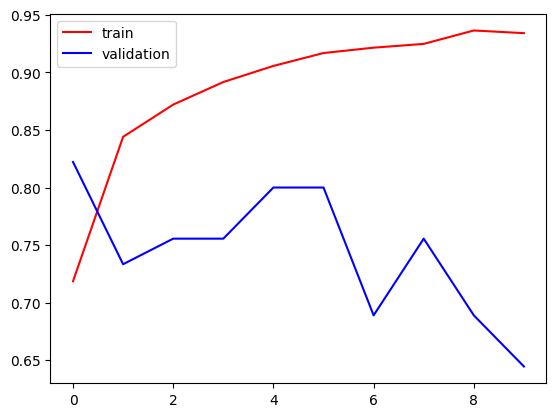

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

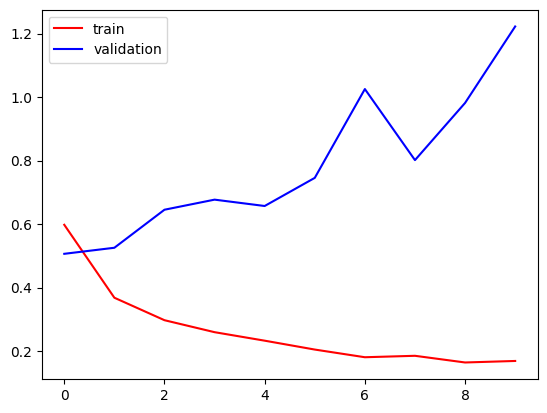

In [32]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


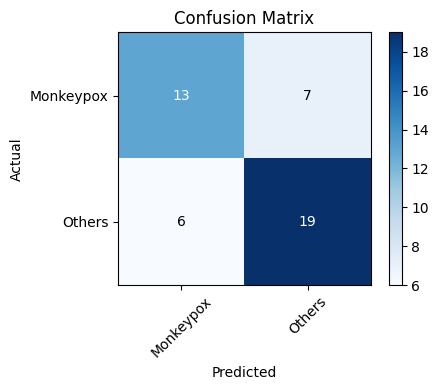

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Step 1: Get true labels and predicted labels
y_true = []
y_pred = []

for images, labels in validation_ds:
    predictions = model.predict(images)
    predicted_labels = (predictions > 0.5).astype(int).flatten()

    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels)

# Step 2: Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 3: Plot the matrix
plt.figure(figsize=(5, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Monkeypox', 'Others'], rotation=45)
plt.yticks(tick_marks, ['Monkeypox', 'Others'])

# Labeling the cells
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


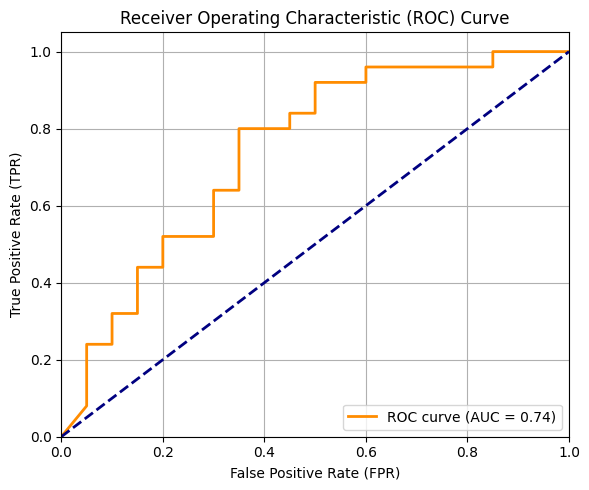

In [40]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Get true labels and predicted probabilities
y_true = []
y_scores = []

for images, labels in validation_ds:
    preds = model.predict(images).flatten()  # Probabilities
    y_scores.extend(preds)
    y_true.extend(labels.numpy())

# Step 2: Calculate FPR, TPR for ROC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Step 3: Plot the ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [57]:
for images, labels in validation_ds:
  print(labels.numpy())
  break

[1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1]


In [60]:
for images, labels in validation_ds:
  print((model.predict(images)))
  break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
[[1.8279921e-07]
 [9.9999940e-01]
 [1.6029923e-04]
 [9.8955005e-01]
 [2.5398568e-03]
 [9.9998212e-01]
 [3.6151870e-10]
 [3.8837772e-03]
 [8.0541271e-01]
 [1.4797767e-01]
 [4.7103286e-01]
 [9.7109085e-01]
 [9.9786502e-01]
 [4.9034552e-05]
 [9.1278893e-01]
 [9.9310404e-01]
 [2.7262020e-01]
 [9.9950457e-01]
 [9.6627587e-01]
 [1.0000000e+00]
 [9.9999309e-01]
 [9.8974830e-01]
 [6.7519915e-01]
 [6.1978227e-01]
 [3.5739595e-06]
 [7.5362575e-01]
 [1.0000000e+00]
 [1.1577178e-02]
 [3.1354022e-04]
 [9.9431664e-01]
 [5.8433026e-01]
 [8.9910624e-05]]
